# 데이터 전처리

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/content/y2019_male.csv',encoding='cp949')

data.set_index(keys='Unnamed: 0',inplace=True) #index를 Unnamed: 0으로 바꿔줌
data.dropna(inplace=True)

a = ['S_SI', 'MH', 'SCHOOL', 'STYPE', 'CTYPE', 'E_RES',
       'E_SES', 'E_S_RCRD', 'GRADE', 'PR_HT', 'PR_BI', 'F_BR', 'PA_MSC', 'bmi',
       'WC_MN', 'M_STR', 'M_SLP_EN', 'M_SAD', 'M_SUI_CON', 'M_SUI_PLN',#stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지
       'M_SUI_ATT', 'V_TRT', 'AC_LT', 'AC_FAGE', 'AC_DAYS', 'AC_AMNT',
       'AC_ACCESS', 'TC_A_LT', 'TC_FAGE', 'TC_ACCESS', 'DR_EXP',
       'S_EDU', 'MF', 'RF', 'FN2', 'parents2', 'INT_WK_MM', 'INT_WD_MM']

data['MH'].replace({'고등학교':0,'중학교': 1}, inplace=True)
data['SCHOOL'].replace({'일반계고':0,'중학교': 1,'특성화계고':2}, inplace=True)
data['STYPE'].replace({'남녀공학':0,'남학교': 1}, inplace=True)
data['CTYPE'].replace({'군지역':0,'대도시': 1,'중소도시':2}, inplace=True)

for i in a:
  data[i] = data[i].astype('category')

datas = data[['MH', 'SCHOOL', 'STYPE', 'CTYPE', 'E_RES',
       'E_SES', 'E_S_RCRD', 'GRADE', 'PR_HT', 'PR_BI', 'F_BR', 'PA_MSC', 'bmi',
       'WC_MN', 'M_STR', 'M_SLP_EN', 'M_SAD', 'M_SUI_CON', 'M_SUI_PLN',
       'M_SUI_ATT', 'V_TRT', 'AC_LT', 'AC_FAGE', 'AC_DAYS', 'AC_AMNT',
       'AC_ACCESS', 'TC_A_LT', 'TC_FAGE', 'TC_ACCESS', 'DR_EXP',
       'S_EDU', 'MF', 'RF', 'FN2', 'parents2', 'INT_WK_MM', 'INT_WD_MM']]

data_target = data['S_SI']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    datas, data_target, stratify=data_target, random_state=42) 

# [로지스틱 회귀]

모델 생성 및 정확도 출력

In [33]:
from sklearn.linear_model import LogisticRegression

# 모델 생성 및 학습 시키기
logistic = LogisticRegression(random_state=0)
logistic.fit(X_train, y_train)

#모델 정확도 출력
print("훈련 세트 정확도: {:.3f}".format(logistic.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(logistic.score(X_test, y_test)))

훈련 세트 정확도: 0.937
테스트 세트 정확도: 0.937


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


변수별 계수 시각화

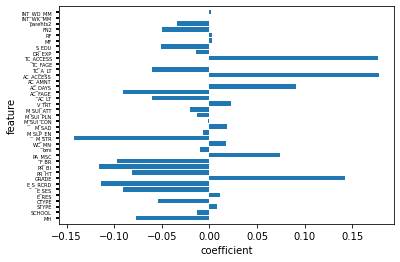

In [37]:
n_features = datas.shape[1]
plt.barh(range(n_features), logistic.coef_.reshape(37,), align='center')
plt.yticks(np.arange(n_features), datas.columns)
plt.tick_params(axis='y',  labelsize=5, width=2)
plt.xlabel("coefficient")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.savefig('logistic_coef.png',dpi=200)

변수별 계수 시각화 (절대값)

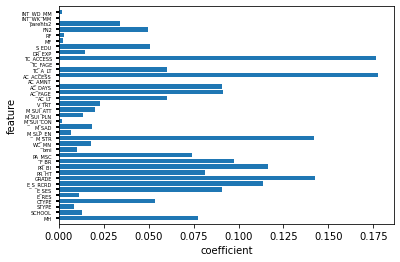

In [36]:
n_features = datas.shape[1]
plt.barh(range(n_features), abs(logistic.coef_.reshape(37,)), align='center')
plt.yticks(np.arange(n_features), datas.columns)
plt.tick_params(axis='y',  labelsize=5, width=2)
plt.xlabel("coefficient")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.savefig('logistic_coef_abs.png',dpi=200)

# [결정트리]

모델 생성 및 정확도 출력

In [20]:
from sklearn.tree import DecisionTreeClassifier

# 모델 생성 및 학습 시키기
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

#모델 정확도 출력
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.886


변수별 중요도 출력

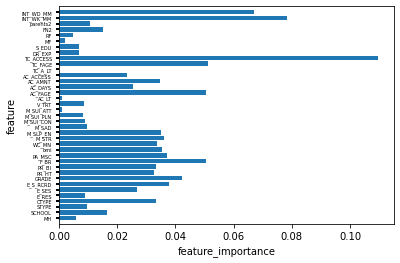

In [38]:
def plot_feature_importances(model):
    n_features = datas.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), datas.columns)
    plt.tick_params(axis='y',  labelsize=5, width=2)
    plt.xlabel("feature_importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    plt.savefig('tree_variable_importance.png',dpi=200)

plot_feature_importances(tree)

# [랜덤 포레스트]

모델 생성 및 정확도 출력

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

# 모델 생성 및 학습 시키기
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

# 모델 정확도 출력
predict1 = rf.predict(X_train)
predict2 = rf.predict(X_test)

print("훈련 세트 정확도: {:.3f}".format(accuracy_score(y_train, predict1)))
print("테스트 세트 정확도: {:.3f}".format(accuracy_score(y_test, predict2)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.938


변수별 중요도 출력

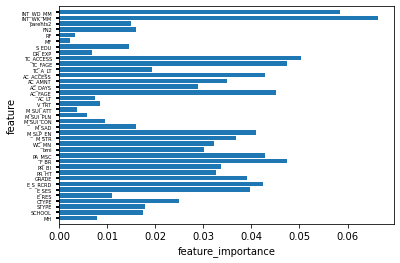

In [32]:
n_features = datas.shape[1]
plt.barh(range(n_features), rf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), datas.columns)
plt.tick_params(axis='y',  labelsize=5, width=2)
plt.xlabel("feature_importance")
plt.ylabel("feature")
plt.ylim(-1, n_features)
plt.savefig('rf_variable_importance.png',dpi=200)